In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('img1.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,img_bin = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

In [3]:
template = cv2.imread('template2.png')
template_gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
_,template_bin = cv2.threshold(template_gray,127,255,cv2.THRESH_BINARY)
kernel = np.array(template_bin==255,dtype=np.uint8)

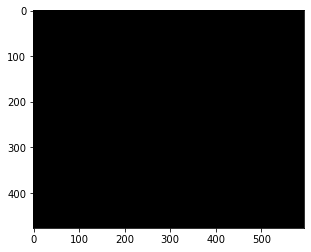

In [4]:
img_hit = cv2.morphologyEx(img_bin, cv2.MORPH_HITMISS, kernel)

plt.imshow(img_hit,cmap='gray')

In [5]:
np.argwhere(img_hit==255)

array([], shape=(0, 2), dtype=int64)